Test VAE model on random frame of random file in `record`

In [19]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from model_vision import BetaVAE

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [21]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "train_record/stage1new"
#model_path_name = "tf_models"
model_path_name = "train_beta_vae"
# NOTE: make sure you copy the vae model you want to test from tf_vae/vae.json to tf_models/vae.json

z_size=64

In [22]:
filelist = os.listdir(DATA_DIR)

In [23]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [24]:
obs.shape

(781, 64, 64, 3)

In [25]:
vae = BetaVAE(z_size=z_size,
              batch_size=1,
              is_training=True,
              reuse=tf.AUTO_REUSE,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'b1.0_20.json'))

INFO:tensorflow:Model using cpu.


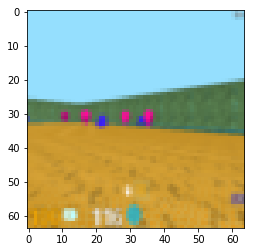

In [26]:
# show recorded frame that will be fed into the input of VAE
frame = random.choice(obs).reshape(1, 64, 64, 3)
plt.imshow(frame[0])
plt.show()



In [27]:

batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)
z = np.copy(batch_z)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])
tt

[ 1.1339  0.9894  0.7491 -0.8362  1.6754 -0.1259 -0.0253  0.1838 -0.944   1.3569 -0.6299  0.6427
  1.3308 -0.6154 -0.4262 -0.7421 -0.7744 -0.8537  0.6178  2.0878  1.7152  0.5303  0.6664  2.8712
  0.3195  0.1464  0.1495  0.9495 -1.753  -1.6634 -0.7579 -1.5378 -0.7607  0.5717 -0.5453  1.314
 -0.2402  0.7717 -0.1676  0.4291  1.0608 -1.4873 -0.9168 -0.2207  0.2675 -0.2037 -2.3273 -1.3107
  0.1354 -1.9023  0.0254  0.3639  0.758   0.6964  1.3775  1.56    0.1657  0.4739  1.0669 -0.7497
  0.1632 -0.8588  1.1586  0.089 ]


array([[14.    ,  0.3686, -0.4262],
       [15.    ,  0.3236, -0.7421],
       [32.    ,  0.4655, -0.7607],
       [38.    ,  0.0007, -0.1676],
       [39.    ,  0.0162,  0.4291],
       [41.    ,  0.1022, -1.4873],
       [43.    ,  0.3382, -0.2207],
       [51.    ,  0.2725,  0.3639],
       [58.    ,  0.0044,  1.0669]])

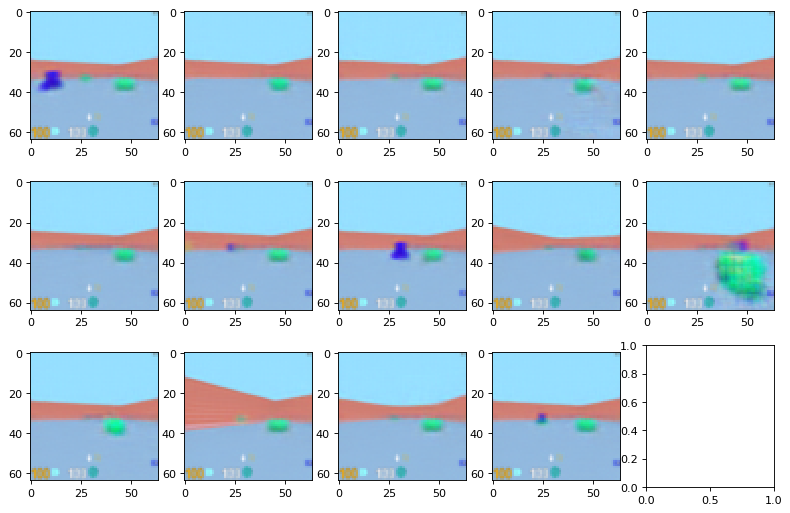

In [10]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b200.0_1.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        z = np.copy(batch_z)
        #z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] += i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

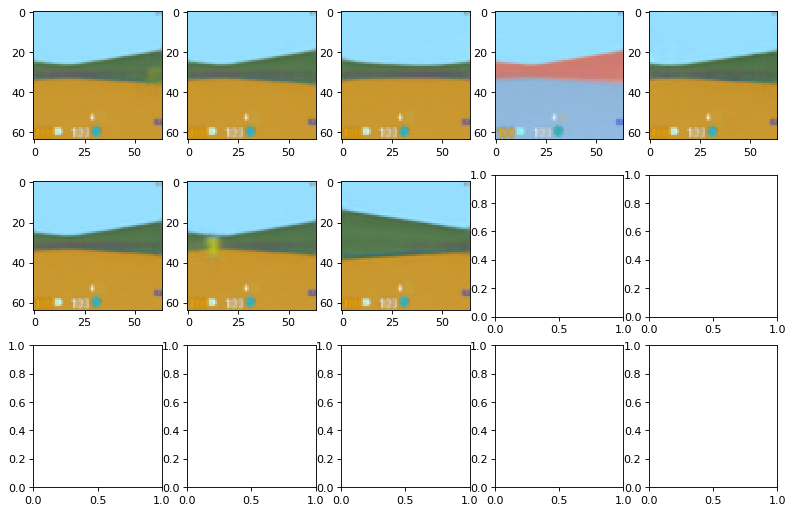

In [28]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b1.0_20.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        z = np.copy(batch_z)
        #z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] += i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

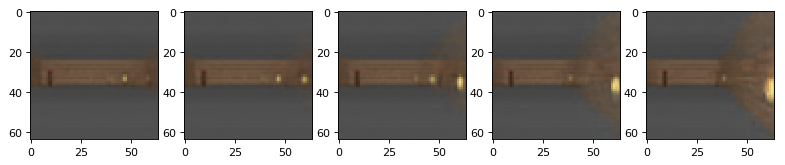

In [627]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'vae.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]


fig, ax = plt.subplots(1,5, figsize=(12,3), dpi=80)
for i in range(5):
    z = np.zeros_like(batch_z)
    z[0][index[5]] = -0 + 0.5 * i
    ax[i].imshow(vae.decode(z)[0])

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
plt.show()

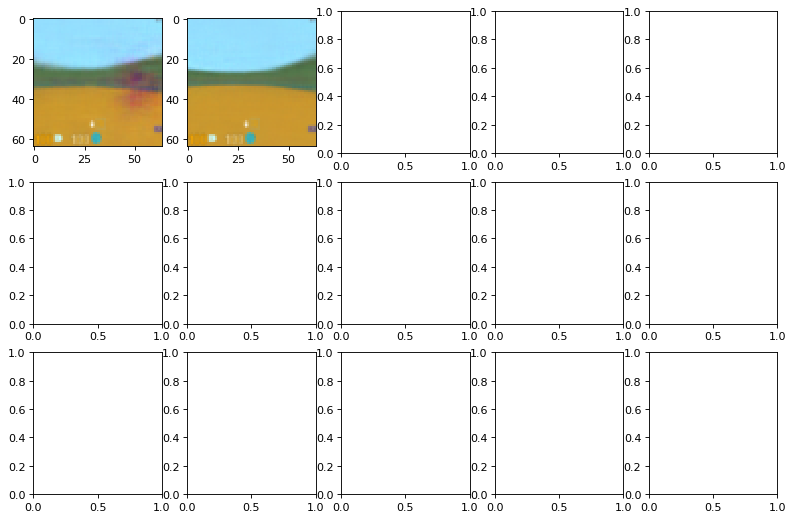

In [29]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b10.0_20.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        z = np.copy(batch_z)
        #z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] += i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

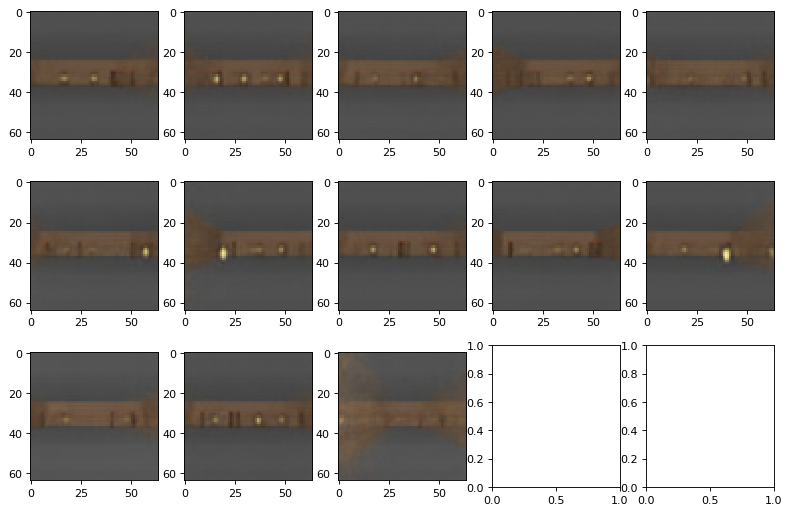

In [584]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b20.0_1.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        #z = np.copy(batch_z)
        z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

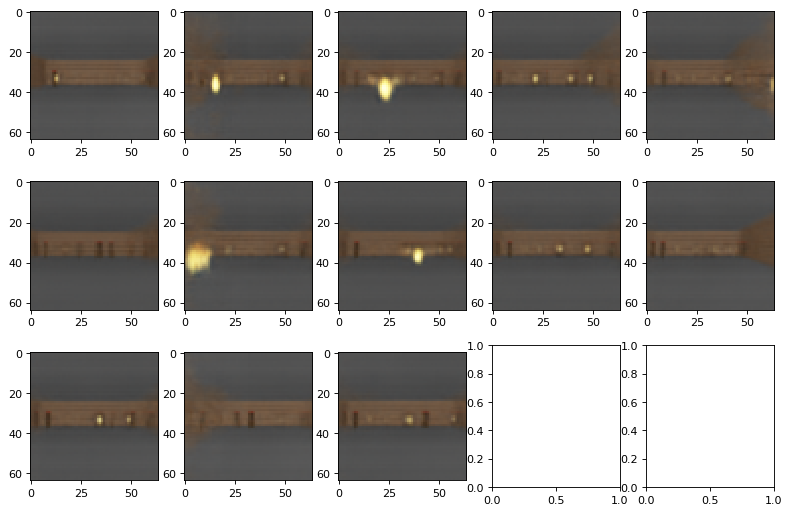

In [585]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b10.0_1.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        #z = np.copy(batch_z)
        z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())